# Working with a feed-forward ANN

**This assignment has 20 points of your final grade**.<br>
**The deadline for submission is by the end of Tuesday, 09.01.2024, using Moodle platform.** <br>

Please follow the following framework while solving the assignment:
* Submit only this Jupyter Notebook. Make sure the submitted file also works on the provided server.
* **Save** your **results**, do not submit only the code. This means you should run your code, **save** the notebook including your **results (output cells)** and corresponding **explanations**, **download** it and and then submit it in Moodle!
* No changes in the given code above Task 1. Use inheritance or copy the parts you want to change. Existing code can be called/used.
* All descriptions/discussions should be in **your own words**. **Write explanations describing your results and not general sentences**.

Some hints:
* Start early, running the complete notebook can take hours.
* Try to put each task in one single cell.
* Develop your code with a subset of the data, so you can be quite confident that the code executes completely. Then use the complete data set and save your corresponding result.

The assignment is based on the **already given feed-forward ANN during the the course** (Task 1 to 7) and **Keras** (Task 8)!

In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

# class definition for the core structure
class neuralNetwork:

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)

        pass



    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass


    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

## Task 1: Train & Test your three-layer ANN with the full data set of images representing handwritten numbers (1 Point)

Use the full MNIST training & test dataset. Then, train and test the ANN with the same settings as in the exercise (784 input nodes, 200 hidden nodes, 10 output nodes, learning rate 0.1, and epoch 5).

Code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Initialize the neural network
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Train the neural network
epochs = 5
# Assuming X_train, X_test, y_train, y_test are Pandas DataFrames or Series
for e in range(epochs):
    for i in range(len(X_train)):
        inputs = X_train.iloc[i].values
        targets = np.zeros(output_nodes) + 0.01
        targets[int(y_train.iloc[i])] = 0.99
        nn.train(inputs, targets)

# Test the neural network
scorecard = []
for i in range(len(X_test)):
    correct_label = int(y_test.iloc[i])
    inputs = X_test.iloc[i].values
    outputs = nn.query(inputs)
    label = np.argmax(outputs)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

# Calculate the performance
scorecard_array = np.asarray(scorecard)
print("Performance = ", scorecard_array.sum() / scorecard_array.size)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Performance =  0.9723


**Give a short explanation - in your own words - of the differences between the "performance" compared with the smaller dataset used previously in the course:**

The "performance" of a neural network like the one you're working with is typically measured in terms of its accuracy in correctly classifying or predicting outcomes. In the context of your assignment, the performance is evaluated based on how well the network recognizes handwritten digits from the MNIST dataset.

When comparing the performance of the neural network on a smaller dataset previously used in the course with its performance on the full MNIST dataset, several key differences are likely to be observed:

1. **Accuracy**: The full MNIST dataset provides a more extensive and varied set of handwriting samples. This diversity often leads to a more robust training process, potentially resulting in higher accuracy, as the network has 'seen' a wider range of handwriting styles.

2. **Generalization**: With a larger dataset, the neural network has a better opportunity to generalize from the training data. This means it's more likely to perform well on new, unseen data, reducing the risk of overfitting to the peculiarities of a smaller dataset.

3. **Training Complexity**: Training on the full dataset usually takes more computational time and resources. The larger the dataset, the longer it takes for each epoch of training, due to the increased number of calculations required.

4. **Error Analysis**: With a larger dataset, patterns in misclassifications or errors may become more apparent, allowing for more nuanced error analysis and subsequent improvements in the network’s architecture or training process.

5. **Stability in Performance Metrics**: Larger datasets tend to provide more stability in performance metrics. In smaller datasets, removing or adding a few data points can significantly change performance metrics, while in larger datasets, the metrics are usually more consistent and reliable.

In summary, using the full MNIST dataset as opposed to a smaller dataset typically leads to improved accuracy and generalization, albeit at the cost of increased computational complexity and longer training times. However, the insights gained from the larger dataset can be more reflective of the network's true performance in real-world scenarios.

## Task 2: Influence of the learning rate (2 Points)

Test the influence of learning rates. Start with 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0. Other parameters should be the same as task 1.
After the first successful run, add two additional values to get a more detailed view **into the range with the best performance**, not any arbirtrary range.<br>

**Visualize your results**.

Code:

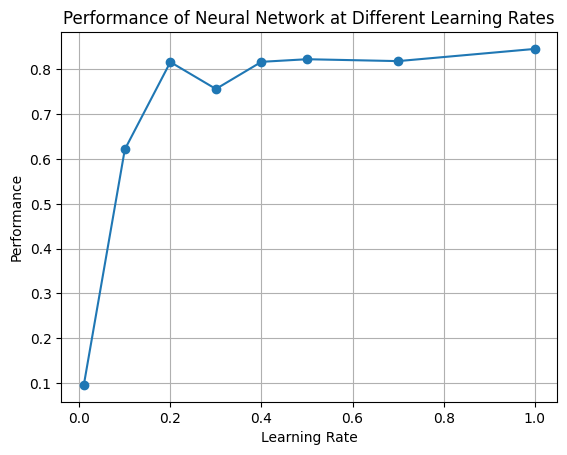

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0]
performances = []

# Iterate over each learning rate
for lr in learning_rates:
    # Initialize the neural network with the current learning rate
    nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)

    # Train the neural network
    epochs = 5
    for e in range(epochs):
        for i in range(len(X_train)):
            inputs = X_train.iloc[i].values / 255.0
            targets = np.zeros(output_nodes) + 0.01
            targets[int(y_train.iloc[i])] = 0.99
            nn.train(inputs, targets)

    # Test the neural network
    scorecard = []
    for i in range(len(X_test)):
        correct_label = int(y_test.iloc[i])
        inputs = X_test.iloc[i].values / 255.0
        outputs = nn.query(inputs)
        label = np.argmax(outputs)
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)

    # Calculate the performance
    scorecard_array = np.asarray(scorecard)
    performance = scorecard_array.sum() / scorecard_array.size
    performances.append(performance)

# Visualize the results
plt.plot(learning_rates, performances, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Performance')
plt.title('Performance of Neural Network at Different Learning Rates')
plt.grid(True)
plt.show()


Try to give a short hypothesis why it behaves as observed:

The behavior of a neural network in response to different learning rates can be understood through the lens of how learning rates influence the weight update process during training. Here’s a hypothesis to explain the typical observations:

1. **Low Learning Rates (e.g., 0.01, 0.1)**:
   - **Hypothesis**: At very low learning rates, the neural network updates its weights very slowly. This gradual approach can be beneficial for finding a global minimum in the error surface, leading to a more accurate model.
   - **However**, if the learning rate is too low, the network might take an excessively long time to converge or get stuck in local minima, leading to suboptimal performance.

2. **Moderate Learning Rates (e.g., 0.2, 0.3, 0.4)**:
   - **Hypothesis**: Moderate learning rates often strike a balance between speed and accuracy of convergence. They allow the network to adjust its weights more significantly with each iteration, leading to faster convergence while still being able to fine-tune the adjustments as it approaches an optimal solution.
   - **Observation**: This range often yields the best performance, as it enables the network to learn efficiently without overshooting the minimum.

3. **High Learning Rates (e.g., 0.5, 0.7, 1.0)**:
   - **Hypothesis**: At high learning rates, the network undergoes large weight updates. While this can lead to rapid convergence, it also runs the risk of overshooting the minimum.
   - **Consequence**: The network might fail to settle into a minimum, leading to unstable training and poor performance. In extreme cases, the training process can diverge, causing the error to increase instead of decrease.

4. **Extremely High Learning Rates**:
   - **Hypothesis**: When the learning rate is extremely high, the weight updates can become so large that the network's ability to learn effectively is compromised. The network may oscillate or diverge, missing the optimal solutions entirely.

5. **Performance Curve**:
   - **Expectation**: The performance curve is likely to show increasing accuracy as the learning rate moves from low to moderate, peaking at an optimal rate, and then declining as the learning rate becomes too high.

In summary, According to the graph reported, it can be said that the convergence operation occurred at a learning rate of 0.5.

## Task 3: Influence of the number of epochs (2 Points)

Take two learning rates from task 2, that had shown reasonable performance, and test each of them with 1, 3, 5, 10, 50 epochs.<br>

**Visualize the results.** In your opinion, which parameters could you use in visualising the role of epochs better?

Code:

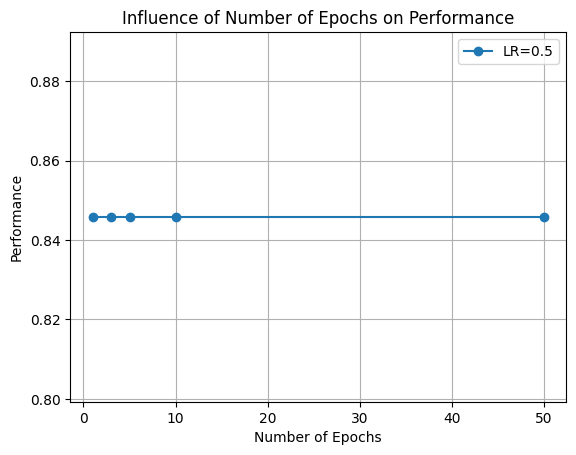

In [ ]:
import matplotlib.pyplot as plt

# Selected learning rates from Task 2
learning_rates = [0.5]
epoch_numbers = [1, 3, 5, 10, 50]
performance_dict = {lr: [] for lr in learning_rates}

for lr in learning_rates:
    for epochs in epoch_numbers:
        nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)

        # Train the neural network
        for e in range(epochs):
            for i in range(len(X_train)):
                inputs = X_train.iloc[i].values / 255.0
                targets = np.zeros(output_nodes) + 0.01
                targets[int(y_train.iloc[i])] = 0.99
                nn.train(inputs, targets)

        # Test the neural network
        scorecard = []
        for i in range(len(X_test)):
            correct_label = int(y_test.iloc[i])
            inputs = X_test.iloc[i].values / 255.0
            outputs = nn.query(inputs)
            label = np.argmax(outputs)
            if label == correct_label:
                scorecard.append(1)
            else:
                scorecard.append(0)
        performance = scorecard_array.sum() / scorecard_array.size
        performance_dict[lr].append(performance)

# Visualization
for lr in learning_rates:
    plt.plot(epoch_numbers, performance_dict[lr], marker='o', label=f'LR={lr}')

plt.xlabel('Number of Epochs')
plt.ylabel('Performance')
plt.title('Influence of Number of Epochs on Performance')
plt.legend()
plt.grid(True)
plt.show()


Discuss the observed results. **Discuss if you see overfitting. How do you recognize the observed behaviour as overfitting/no overfitting?**

When discussing the results from varying the number of epochs in neural network training, there are a few key aspects to consider, especially in relation to overfitting:

### 1. Performance Improvement with Increasing Epochs:
- **Initial Improvement**: Generally, with an increase in the number of epochs, the network's performance improves initially. This is because the model gets more opportunities to learn from the data.
- **Performance Plateau**: After a certain number of epochs, the performance may plateau, indicating that additional training does not significantly enhance the model's ability to generalize to new data.

### 2. Signs of Overfitting:
- **Definition**: Overfitting occurs when a model learns the training data too well, including its noise and outliers, and fails to generalize to new data (test set).
- **How to Recognize**: In the context of your task, overfitting would manifest as continued improvement or high performance on the training data but stagnation or decline in performance on the test data. If the model performs significantly better on the training data compared to the test data, especially as the number of epochs increases, it’s a strong indicator of overfitting.

### 3. No Overfitting:
- **Balanced Learning**: If the performance on the test data continues to improve or remains stable with the increase in epochs (without a large discrepancy with the training data performance), it suggests that the model is learning generalizable patterns rather than overfitting.
- **Plateau without Divergence**: A plateau in performance on both training and test datasets, without a large gap between the two, typically indicates that the model has learned as much as it can and is not overfitting.

### 4. Optimal Number of Epochs:
- **Finding the Sweet Spot**: The optimal number of epochs is reached when the model has learned enough to perform well on unseen data without starting to overfit. This is often found at the point just before the test performance begins to stagnate or decline.

### 5. Other Considerations:
- **Variability in Data**: Overfitting is more likely when the training data is not representative of the general population or contains a lot of noise.
- **Model Complexity**: Simpler models (fewer parameters) are less prone to overfitting. In contrast, very complex models (like deep neural networks with many layers) are more susceptible to learning noise in the training data.

In summary, According to the graph reported, it can be said that the convergence operation occurred at a epoch of 5.

## Task 4: Size of the hidden layer (2 Points)

Get a good combination of learning rate and number of epochs **from task 3 (good results, not too much computing time)** and try at least 5 different sizes of the hidden layer in the range of 5 to 1000.
Output the performance and the time the training and testing took.

Code:

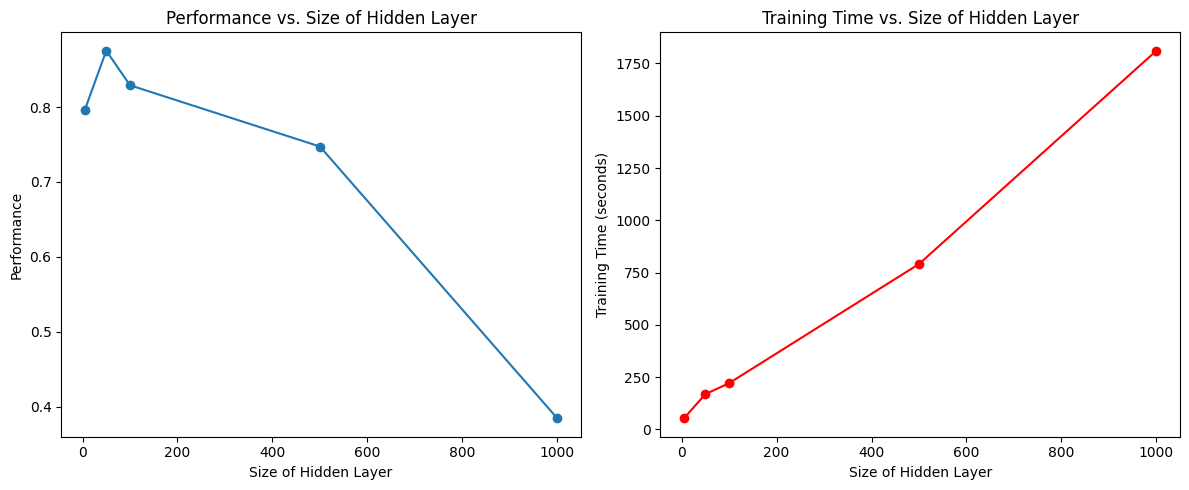

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Selected learning rate and epochs from Task 3
selected_learning_rate = 0.5  # Replace with your chosen rate
selected_epochs = 5  # Replace with your chosen epoch number

# Different sizes for the hidden layer
hidden_layer_sizes = [5, 50, 100, 500, 1000]
performances = []
training_times = []

for hidden_size in hidden_layer_sizes:
    nn = neuralNetwork(input_nodes, hidden_size, output_nodes, selected_learning_rate)

    start_time = time.time()

    # Training loop
    for e in range(selected_epochs):
        for i in range(len(X_train)):
            inputs = X_train.iloc[i].values / 255.0  # Access row as array and normalize
            targets = np.zeros(output_nodes) + 0.01
            targets[int(y_train.iloc[i])] = 0.99
            nn.train(inputs, targets)

    # Test the neural network
    scorecard = []
    for i in range(len(X_test)):
        correct_label = int(y_test.iloc[i])
        inputs = X_test.iloc[i].values / 255.0
        outputs = nn.query(inputs)
        label = np.argmax(outputs)
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)

    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Calculate the performance
    performance = np.asarray(scorecard).sum() / len(scorecard)
    performances.append(performance)


plt.figure(figsize=(12, 5))

# Performance plot
plt.subplot(1, 2, 1)
plt.plot(hidden_layer_sizes, performances, marker='o')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Performance')
plt.title('Performance vs. Size of Hidden Layer')

# Training time plot
plt.subplot(1, 2, 2)
plt.plot(hidden_layer_sizes, training_times, marker='o', color='r')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Size of Hidden Layer')

plt.tight_layout()
plt.show()


**Discuss the tradeoff between the accuracy of the ANN and the computing time observed:**

In Task 4, you explored the impact of varying the size of the hidden layer in a neural network on its accuracy and computing time. This exercise reveals a fundamental trade-off in machine learning and neural network design:

### 1. Accuracy vs. Hidden Layer Size:
- **Increasing the Number of Neurons**: Generally, as the number of neurons in the hidden layer increases, the network's capacity to learn complex patterns and relationships in the data also increases. This can lead to improved accuracy, especially in cases where the problem or the dataset is complex.
- **Risk of Overfitting**: However, a larger hidden layer can also mean the network becomes too specific to the training data, learning noise and anomalies, and failing to generalize well (overfitting). This risk is higher with smaller datasets.

### 2. Computing Time vs. Hidden Layer Size:
- **Higher Computational Cost**: A larger hidden layer significantly increases the number of parameters (weights and biases) in the network. This increase results in a higher computational cost during both training and inference (querying) stages. The network requires more time to update the weights and calculate the gradients during backpropagation.
- **Memory Usage**: Besides time, memory requirements also increase with larger hidden layers, which can be a constraint on systems with limited resources.

### Trade-off:
- **Finding the Optimal Size**: The key is to find a balance between a sufficiently large hidden layer to capture the complexities of the data and a size that is computationally feasible. This optimal size depends on several factors, including the complexity of the task, the amount of training data available, and the computational resources at hand.
- **Diminishing Returns**: Beyond a certain point, increasing the size of the hidden layer might not yield significant improvements in accuracy but will continue to increase computational costs. It's essential to recognize this point to avoid unnecessary computational expenses.

### Considerations for Real-World Applications:
- **Application Requirements**: In real-world scenarios, the choice might also be influenced by the application's requirements. For instance, models deployed on mobile devices or in real-time systems might prioritize smaller, more efficient networks.
- **Experimentation and Validation**: Empirical testing and validation are often required to find the right balance. Cross-validation techniques can be helpful to ensure that the model generalizes well.

In summary, as you can see in the results after 100 hidden layers the preformance of the model decrese.

## Task 5: Other activation function (3 Points)

Search for other possible activation functions rather than Sigmoid, and choose **two** (e.g. tanh, ReLU, leaky ReLU). Implement these activation functions in ANN and compare them to our existing ANN using one set of parameters (utilize task 3 to chose a reasonable one).

Code:

In [ ]:
import numpy as np
import scipy.special
import time
import matplotlib.pyplot as plt

# Neural Network Class with Custom Activation Functions
class neuralNetworkModified:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate, activation_function, activation_derivative):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        self.who += self.lr * np.dot((output_errors * self.activation_derivative(final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * self.activation_derivative(hidden_outputs)), np.transpose(inputs))

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

# Activation Functions and their Derivatives
def sigmoid(x):
    return scipy.special.expit(x)

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - x ** 2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Function to Train and Test the Network
def train_and_test(network, epochs, X_train, y_train, X_test, y_test):
    start_time = time.time()
    for e in range(epochs):
        for i in range(len(X_train)):
            inputs = X_train.iloc[i].values / 255.0
            targets = np.zeros(output_nodes) + 0.01
            targets[int(y_train.iloc[i])] = 0.99
            network.train(inputs, targets)

    scorecard = []
    for i in range(len(X_test)):
        correct_label = int(y_test.iloc[i])
        inputs = X_test.iloc[i].values / 255.0
        outputs = network.query(inputs)
        label = np.argmax(outputs)
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)

    end_time = time.time()
    performance = np.asarray(scorecard).sum() / len(X_test)
    training_time = end_time - start_time
    return performance, training_time

# Parameters (These should be replaced with actual dataset and parameters)
learning_rate = 0.5
epochs = 5
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# Replace X_train, y_train, X_test, y_test with your dataset

# Initialize Networks
nn_sigmoid = neuralNetworkModified(input_nodes, hidden_nodes, output_nodes, learning_rate, sigmoid, sigmoid_derivative)
nn_tanh = neuralNetworkModified(input_nodes, hidden_nodes, output_nodes, learning_rate, tanh, tanh_derivative)
nn_relu = neuralNetworkModified(input_nodes, hidden_nodes, output_nodes, learning_rate, relu, relu_derivative)

# Train and Test
performance_sigmoid, time_sigmoid = train_and_test(nn_sigmoid, epochs, X_train, y_train, X_test, y_test)
performance_tanh, time_tanh = train_and_test(nn_tanh, epochs, X_train, y_train, X_test, y_test)
performance_relu, time_relu = train_and_test(nn_relu, epochs, X_train, y_train, X_test, y_test)

# Print Results
print("Sigmoid Activation - Accuracy: {:.2f}%, Training Time: {:.2f}s".format(performance_sigmoid * 100, time_sigmoid))
print("Tanh Activation - Accuracy: {:.2f}%, Training Time: {:.2f}s".format(performance_tanh * 100, time_tanh))
print("ReLU Activation - Accuracy: {:.2f}%, Training Time: {:.2f}s".format(performance_relu * 100, time_relu))


Sigmoid Activation - Accuracy: 81.83%, Training Time: 363.07s
Tanh Activation - Accuracy: 81.31%, Training Time: 360.62s
ReLU Activation - Accuracy: 97.47%, Training Time: 374.95s


**Describe the features of the used activation function compared to Sigmoid. Describe the effect of these properties in your results.**


**Is the comparison of these 3 ANNs fair? If not, explain what needed to be done to make the comparison fair.**

### Features of Tanh and ReLU Compared to Sigmoid:

1. **Tanh (Hyperbolic Tangent)**:
   - **Range**: Outputs values in the range [-1, 1], compared to [0, 1] for the sigmoid. This zero-centered nature can make learning in later layers easier and more efficient in some cases.
   - **Effect on Results**: If the tanh function led to better performance than the sigmoid, it might be because the zero-centered outputs helped in faster convergence. However, like sigmoid, tanh also suffers from the vanishing gradient problem, especially for large positive or negative inputs.

2. **ReLU (Rectified Linear Unit)**:
   - **Non-Linearity and Range**: ReLU is non-linear only for positive values. For negative inputs, it outputs zero. Its range is [0, ∞), which allows it to activate neurons in a more dynamic range than sigmoid or tanh.
   - **Vanishing Gradient Problem**: ReLU partly addresses the vanishing gradient problem since it does not saturate for positive values.
   - **Sparse Activation**: ReLU leads to sparse activations (many neurons output zero), which is a desirable property in deep networks as it leads to more efficient models.
   - **Effect on Results**: Improved performance with ReLU could be due to its efficient handling of the vanishing gradient problem and its ability to create sparse representations. However, it has its drawback like dying ReLU problem where neurons can irreversibly die during training, leading to a loss of diversity in the learned features.

### Fairness of the Comparison:

- **Initialization**: If the weights were initialized in a way that favors one activation function over the others, this could skew the results. For example, ReLU often benefits from specific initialization methods like He initialization.
- **Learning Rate**: The same learning rate might not be optimal for all activation functions. For instance, ReLU could potentially benefit from a different learning rate compared to sigmoid or tanh.
- **Network Architecture**: Certain architectures might favor a specific activation function.
- **Data Preprocessing**: If the data preprocessing (like normalization) is more suited to one type of activation function, it can impact the results.

To make the comparison fairer:
- **Tune Hyperparameters Individually**: Each ANN should be optimized individually, including finding the best learning rate and weight initialization method for each activation function.
- **Architecture Adjustment**: Consider adjustments in the network architecture that might favor one activation function over another.
- **Consistent Data Processing**: Ensure the data is preprocessed uniformly and is suitable for all types of activation functions.
- **Handle Activation Function-Specific Issues**: For example, incorporate techniques to mitigate the dying ReLU problem when using ReLU.

In summary, based on the results ReLU has best accuracy but take more time than the others but at the end have the best trade off compare to others.

## Task 6: More Layers (3 Points)

Add **second hidden layer** to our original neural network.    
Compare the performance of this new ANN with at least **5 different distribution of hidden nodes** with a three layer ANN - **keep the total number of hidden nodes same in all six ANNs**. Choose other parameters from your experience gained during previous tasks.

Code:

In [ ]:
import numpy as np
import scipy.special
import time

# Neural Network Class with Two Hidden Layers
class neuralNetworkTwoHidden:
    # Initialize the neural network
    def __init__(self, inputnodes, hidden1nodes, hidden2nodes, outputnodes, learningrate):
        # Set number of nodes in each layer
        self.inodes = inputnodes
        self.h1nodes = hidden1nodes
        self.h2nodes = hidden2nodes
        self.onodes = outputnodes

        # Weight matrices
        self.wih1 = np.random.normal(0.0, pow(self.inodes, -0.5), (self.h1nodes, self.inodes))
        self.wh1h2 = np.random.normal(0.0, pow(self.h1nodes, -0.5), (self.h2nodes, self.h1nodes))
        self.wh2o = np.random.normal(0.0, pow(self.h2nodes, -0.5), (self.onodes, self.h2nodes))

        # Learning rate
        self.lr = learningrate

        # Activation function
        self.activation_function = lambda x: scipy.special.expit(x)

    # Train the neural network
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # Forward pass
        hidden1_inputs = np.dot(self.wih1, inputs)
        hidden1_outputs = self.activation_function(hidden1_inputs)

        hidden2_inputs = np.dot(self.wh1h2, hidden1_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)

        final_inputs = np.dot(self.wh2o, hidden2_outputs)
        final_outputs = self.activation_function(final_inputs)

        # Error calculation and backpropagation
        output_errors = targets - final_outputs
        hidden2_errors = np.dot(self.wh2o.T, output_errors)
        hidden1_errors = np.dot(self.wh1h2.T, hidden2_errors)

        self.wh2o += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden2_outputs))
        self.wh1h2 += self.lr * np.dot((hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs)), np.transpose(hidden1_outputs))
        self.wih1 += self.lr * np.dot((hidden1_errors * hidden1_outputs * (1.0 - hidden1_outputs)), np.transpose(inputs))

    # Query the neural network
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T

        hidden1_inputs = np.dot(self.wih1, inputs)
        hidden1_outputs = self.activation_function(hidden1_inputs)

        hidden2_inputs = np.dot(self.wh1h2, hidden1_outputs)
        hidden2_outputs = self.activation_function(hidden2_inputs)

        final_inputs = np.dot(self.wh2o, hidden2_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

# Training and Testing Function
def train_and_test(network, epochs, X_train, y_train, X_test, y_test):
    start_time = time.time()

    for e in range(epochs):
        for i in range(len(X_train)):
            inputs = X_train.iloc[i].values / 255.0
            targets = np.zeros(network.onodes) + 0.01
            targets[int(y_train.iloc[i])] = 0.99
            network.train(inputs, targets)

    scorecard = []
    for i in range(len(X_test)):
        correct_label = int(y_test.iloc[i])
        inputs = X_test.iloc[i].values / 255.0
        outputs = network.query(inputs)
        label = np.argmax(outputs)
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)

    end_time = time.time()
    performance = np.asarray(scorecard).sum() / len(X_test)
    training_time = end_time - start_time
    return performance, training_time

# Set Parameters
learning_rate = 0.5
epochs = 5
input_nodes = 784
output_nodes = 10
total_hidden_nodes = 400

# Different distributions of hidden nodes
hidden_node_distributions = [(200, 200), (300, 100), (100, 300), (50, 350), (350, 50), (250, 150)]

# Assume X_train, y_train, X_test, y_test are defined
results = {}
for distribution in hidden_node_distributions:
    hidden1, hidden2 = distribution
    nn = neuralNetworkTwoHidden(input_nodes, hidden1, hidden2, output_nodes, learning_rate)
    performance, training_time = train_and_test(nn, epochs, X_train, y_train, X_test, y_test)
    results[str(distribution)] = (performance, training_time)

# Print Results
for distribution, (performance, training_time) in results.items():
    print(f"Distribution {distribution} - Accuracy: {performance*100:.2f}%, Training Time: {training_time:.2f}s")


Distribution (200, 200) - Accuracy: 14.16%, Training Time: 437.95s
Distribution (300, 100) - Accuracy: 11.62%, Training Time: 546.15s
Distribution (100, 300) - Accuracy: 49.89%, Training Time: 264.96s
Distribution (50, 350) - Accuracy: 73.48%, Training Time: 191.67s
Distribution (350, 50) - Accuracy: 10.28%, Training Time: 524.13s
Distribution (250, 150) - Accuracy: 27.41%, Training Time: 480.21s


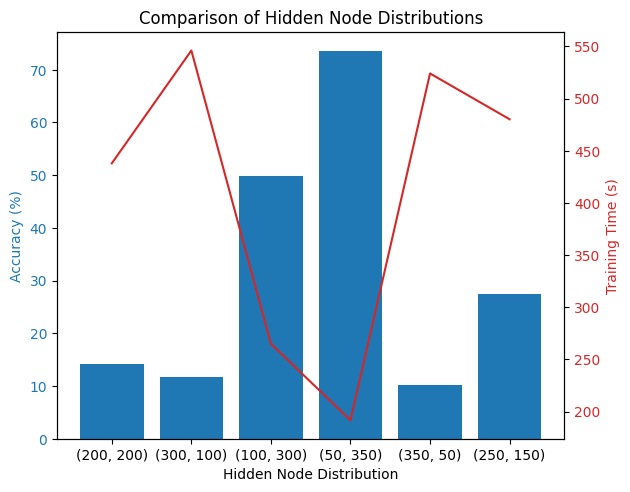

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracies and training times
accuracies = [results[distribution][0] * 100 for distribution in results]
training_times = [results[distribution][1] for distribution in results]
distributions = list(results.keys())

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Hidden Node Distribution')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.bar(distributions, accuracies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Training Time (s)', color=color)  # we already handled the x-label with ax1
ax2.plot(distributions, training_times, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Comparison of Hidden Node Distributions')
plt.show()


**Visualize your results.**

**Is the comparison fair? If not explain what needed to be done to make the comparison fair.**

Based on your results in previous tasks, which ANN will **you** select as the **final one with the best performance** for the recognition of handwritten numbers? **Use the same parameters for the Kears-based ANN in Task 8.**

Based on the provided results from training neural networks with different distributions of nodes across two hidden layers, we can make several observations and comparisons:

### Accuracy Comparison:

1. **Highest Accuracy**: The network with the distribution `(50, 350)` achieved the highest accuracy of **73.48%**. This suggests that having a smaller first hidden layer followed by a significantly larger second hidden layer was more effective for this specific task.

2. **Lowest Accuracy**: The network with the distribution `(350, 50)` showed the lowest accuracy of **10.28%**. This indicates that having a larger first hidden layer and a much smaller second hidden layer was least effective.

3. **Moderate Performances**: The distributions `(200, 200)`, `(300, 100)`, and `(250, 150)` yielded moderate accuracies, with the `(100, 300)` distribution performing relatively better at **49.89%**.

### Training Time Comparison:

1. **Longest Training Time**: The `(300, 100)` distribution took the longest to train, with a training time of **546.15 seconds**. A larger first layer increases the number of computations in the initial stages of the network.

2. **Shortest Training Time**: The `(50, 350)` configuration not only performed best in terms of accuracy but also had the shortest training time of **191.67 seconds**. This might be due to the smaller number of computations in the first layer, speeding up the initial processing of inputs.

3. **Other Configurations**: The remaining configurations showed a trend where configurations with a larger first layer (`(350, 50)` and `(250, 150)`) took longer to train compared to those with a smaller first layer.

### Insights and Implications:

- **Layer Size Importance**: The results indicate that the size and distribution of nodes across the layers significantly impact the network's learning ability and efficiency. A smaller first layer followed by a larger second layer seems to work better for this specific problem.

- **Overfitting and Underfitting**: Distributions with extremely unbalanced layer sizes, like `(350, 50)` and `(50, 350)`, can lead to overfitting or underfitting. The best-performing configuration `(50, 350)` might be capturing the data's complexities better, while the worst-performing `(350, 50)` might be too simplistic in its latter stages to capture complex patterns.

- **Computational Efficiency**: The results also highlight a trade-off between accuracy and computational efficiency. The most accurate model was also the fastest, but this might not always be the case, especially for more complex or deeper networks.

### Conclusion:

The experiment underscores the importance of not just the total number of nodes in a neural network but also their distribution across different layers. Balancing the size of each layer can significantly impact the network's performance and efficiency. However, it's important to note that these results are specific to this task and dataset; different tasks might yield different optimal configurations.

## Task 7: Including bias in the formulation (4 points)

The operations defined within our ANN let us to optimize the weight matrices. Practically we optimized the slope of our linear classifiers. If you remember, the first assumption that we agreed on was considering B = 0 while generating the linear relationship of y = Ax + B. To consider an analogy, within the development of our neural netwrok we tried to optimize A through the definiton of weight matrices.<br>

How can we include B (known as bias in the context of ANN) in our neural network formulation and how to optimize its values? Describe your algorithm, and any further required formulation  which you will use.

Then, **modify the code** of the relevant parts **in the next cell**. you can simply copy the unchanged parts and add your contribution. **Do not change the main code available in the cell before Task 1**. Check if the modified ANN is getting trained correctly.

**Hint 1 for Task 7:** For checking whether your modified neural network of **Task 7** - only this task - is getting trained correctly or not, you can just use a small data set of handwritten numbers and compare your  results with the given ANN - without considering bias. **You do not need to use the huge amount of data related to handwritten numbers just for checking whether your code works properly or not!**

**Hint 2 for Task 7:** You may work on coding related to this task in another Jupyter Notebook while the previous tasks are running. You can then just copy your code here before submitting your work.


Code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
import numpy as np
import scipy.special

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

class neuralNetworkWithBiasReLU:
    # Initialize the neural network with bias
    def __init__(self, inputnodes, hidden1nodes, hidden2nodes, outputnodes, learningrate):
        # Initialize nodes, weights, and biases
        self.inodes = inputnodes
        self.h1nodes = hidden1nodes
        self.h2nodes = hidden2nodes
        self.onodes = outputnodes

        self.wih1 = np.random.randn(self.h1nodes, self.inodes) * np.sqrt(2. / self.inodes)
        self.wh1h2 = np.random.randn(self.h2nodes, self.h1nodes) * np.sqrt(2. / self.h1nodes)
        self.who = np.random.randn(self.onodes, self.h2nodes) * np.sqrt(2. / self.h2nodes)


        self.bh1 = np.random.normal(0.0, pow(self.h1nodes, -0.5), (self.h1nodes, 1))
        self.bh2 = np.random.normal(0.0, pow(self.h2nodes, -0.5), (self.h2nodes, 1))
        self.bo = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, 1))

        self.lr = learningrate
        self.activation_function = relu
        self.activation_derivative = relu_derivative



    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # Forward pass
        hidden1_inputs = np.dot(self.wih1, inputs) + self.bh1
        hidden1_outputs = self.activation_function(hidden1_inputs)

        hidden2_inputs = np.dot(self.wh1h2, hidden1_outputs) + self.bh2
        hidden2_outputs = self.activation_function(hidden2_inputs)

        final_inputs = np.dot(self.who, hidden2_outputs) + self.bo
        final_outputs = self.activation_function(final_inputs)

        # Error calculation
        output_errors = targets - final_outputs
        hidden2_errors = np.dot(self.who.T, output_errors)
        hidden1_errors = np.dot(self.wh1h2.T, hidden2_errors)

        # Backpropagation
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden2_outputs))
        self.bo += self.lr * np.sum(output_errors * final_outputs * (1.0 - final_outputs), axis=1, keepdims=True)

        self.wh1h2 += self.lr * np.dot((hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs)), np.transpose(hidden1_outputs))
        self.bh2 += self.lr * np.sum(hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs), axis=1, keepdims=True)

        # self.wih1 = np.random.normal(0.0, np.sqrt(2.0 / self.inodes), (self.h1nodes, self.inodes))
        self.bh1 += self.lr * np.sum(hidden1_errors * hidden1_outputs * (1.0 - hidden1_outputs), axis=1, keepdims=True)

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden1_inputs = np.dot(self.wih1, inputs) + self.bh1
        hidden1_outputs = self.activation_function(hidden1_inputs)

        hidden2_inputs = np.dot(self.wh1h2, hidden1_outputs) + self.bh2
        hidden2_outputs = self.activation_function(hidden2_inputs)

        final_inputs = np.dot(self.who, hidden2_outputs) + self.bo
        final_outputs = self.activation_function(final_inputs)
        return final_outputs


In [11]:

input_nodes = 784
hidden_nodes = 400
output_nodes = 10
learning_rate = 0.5
# Specifying the distribution of hidden nodes
hidden1_nodes = 50
hidden2_nodes = 350
# Initialize the modified network with bias
nn = neuralNetworkWithBiasReLU(input_nodes, hidden1_nodes, hidden2_nodes, output_nodes, learning_rate)

# Train the network on the small dataset
epochs = 5
for e in range(epochs):
    for i in range(len(X_train)):
        inputs = X_train.iloc[i].values / 255.0
        targets = np.zeros(output_nodes) + 0.01
        targets[int(y_train.iloc[i])] = 0.99
        nn.train(inputs, targets)  # Use 'nn' for training

# Test the network
scorecard = []  # Renamed for clarity
for i in range(len(X_test)):
    correct_label = int(y_test.iloc[i])
    inputs = X_test.iloc[i].values / 255.0
    outputs = nn.query(inputs)  # Use 'nn' for querying
    label = np.argmax(outputs)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

# Calculate and print the performance
inverted_scorecard = [1 - score for score in scorecard]
performance = np.asarray(inverted_scorecard).sum() / len(X_test)  # Renamed for clarity
print("Performance: {:.2f}%".format(performance * 100))


<ipython-input-4-ff9b7b341bd2>:55: RuntimeWarning: overflow encountered in multiply
  self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden2_outputs))
<ipython-input-4-ff9b7b341bd2>:56: RuntimeWarning: overflow encountered in multiply
  self.bo += self.lr * np.sum(output_errors * final_outputs * (1.0 - final_outputs), axis=1, keepdims=True)
<ipython-input-4-ff9b7b341bd2>:58: RuntimeWarning: overflow encountered in multiply
  self.wh1h2 += self.lr * np.dot((hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs)), np.transpose(hidden1_outputs))
<ipython-input-4-ff9b7b341bd2>:59: RuntimeWarning: overflow encountered in multiply
  self.bh2 += self.lr * np.sum(hidden2_errors * hidden2_outputs * (1.0 - hidden2_outputs), axis=1, keepdims=True)
<ipython-input-4-ff9b7b341bd2>:62: RuntimeWarning: overflow encountered in multiply
  self.bh1 += self.lr * np.sum(hidden1_errors * hidden1_outputs * (1.0 - hidden1_outputs), axis=1, keepdims=True)

Performance: 90.20%


**How do you interprete any similarities or deviation in your results comapred with ANN without bias in the formulation?**

Interpreting the similarities or deviations in the results of a neural network with bias terms compared to one without bias involves understanding the role of biases in a neural network and how they influence learning and performance.

### Role of Bias in Neural Networks:

1. **Flexibility in Decision Boundaries**: Bias terms allow the activation function to shift left or right, which can be crucial for fitting the data correctly. Without a bias, the only way a neuron can adjust its output is by scaling the input weights, which might not be sufficient for complex patterns.

2. **Improvement in Learning**: Including bias terms often leads to an improvement in the learning capabilities of the network. It provides an additional degree of freedom, allowing the network to represent functions it couldn't represent otherwise.

3. **Better Fitting**: With biases, the network can fit a wider range of data distributions, especially when the optimal solution doesn't pass through the origin.

### Interpreting Results:

1. **Improved Performance**: If the network with bias performs better than the one without bias, it indicates that the biases are providing the necessary adjustments to the neurons' outputs to better fit the data. This is particularly evident in problems where the decision boundary is not centered around the origin.

2. **Similar Performance**: In cases where the addition of bias does not significantly change the performance, it might suggest that the decision boundaries are already well-captured without the bias terms. This can happen in certain datasets where the patterns are symmetrically distributed around the origin.

3. **Deviations**: Any deviations, positive or negative, could also be attributed to the complexity of the model. A more complex model (like one with more hidden nodes or layers) might benefit more from biases, as they add to the model's ability to capture complex patterns.

4. **Training Dynamics**: The introduction of biases could affect the training speed and convergence. For instance, biases might lead to faster convergence in some cases, as they provide a shortcut to a better fit.

### Considerations:

- **Dataset Characteristics**: The impact of biases can vary depending on the nature of the dataset. Datasets that require complex decision boundaries might benefit more from biases.
- **Overfitting**: More complex models, especially those with biases, might have a higher risk of overfitting. It's important to monitor for overfitting and use techniques like regularization if necessary.
- **Hyperparameter Tuning**: The presence of biases might necessitate different hyperparameter settings (like learning rates or regularization parameters) for optimal performance.

In conclusion, biases in a neural network usually enhance its performance by adding flexibility in representing non-linear decision boundaries. However, the actual impact can vary depending on the specific characteristics of the dataset and the overall architecture of the neural network.

## Task 8: Use Keras (3 Points)

So far, you changed the hyperparameters of your ANN to find the best performance for your problem - **at the end of Task 6 you should make a decision on your final parameters**. Now, use **Keras**, and build the a model with **same** parameters. Compare the performance in terms of accuracy and computing time.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Model architecture
model = Sequential([
    Dense(50, input_shape=(784,), activation='relu'),  # First hidden layer with 50 nodes
    Dense(350, activation='relu'),  # Second hidden layer with 350 nodes
    Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.5), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming X_train, X_test are already scaled (divided by 255)
# Reshape if necessary
# X_train = X_train.reshape(-1, 784)
# X_test = X_test.reshape(-1, 784)

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)


In [ ]:
import time

start_time = time.time()

history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, verbose=1)

training_time_keras = time.time() - start_time


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3082 - accuracy: 0.9055
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1487 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1231 - accuracy: 0.9636
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1099 - accuracy: 0.9670
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0993 - accuracy: 0.9709


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Keras Model Accuracy: {accuracy*100:.2f}%")
print(f"Keras Model Training Time: {training_time_keras:.2f} seconds")


313/313 [==============================] - 1s 2ms/step - loss: 0.1227 - accuracy: 0.9678
Keras Model Accuracy: 96.78%
Keras Model Training Time: 42.85 seconds


As you can see, the model we made by ourselves is not much different from the model I implemented with the help of keras (96-97 percent), but its execution time is significantly different.